In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [34]:
batch_size = 128
lr = 0.0002
latent_dim = 100
epochs = 10001
(x_train, _), (_, _) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = x_train.reshape(x_train.shape[0], 784)

In [24]:
generator = Sequential()
generator.add(Dense(256, input_shape=(latent_dim,)))
generator.add(LeakyReLU())
generator.add(BatchNormalization())
generator.add(Dense(512))
generator.add(LeakyReLU())
generator.add(BatchNormalization())
generator.add(Dense(784, activation='tanh'))
generator.add(Reshape((28, 28)))

In [25]:
discriminator = Sequential()
discriminator.add(Dense(512, input_shape=(784,)))
discriminator.add(LeakyReLU())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr), metrics=['accuracy'])

In [32]:
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
x = generator(gan_input)
gan_output = discriminator(Flatten()(x))
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr))

1/1 [==============================] - 0s 64ms/step


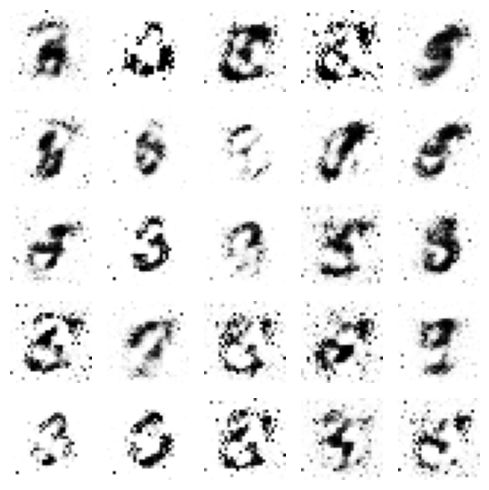

4/4 [==============================] - 0s 31ms/step


KeyboardInterrupt: 

In [36]:
for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_images = x_train[idx]
    
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_images = generator.predict(noise, verbose=0)
    fake_images = fake_images.reshape(batch_size, 784)
    
    real_y = np.ones((batch_size, 1))
    fake_y = np.zeros((batch_size, 1))
    
    d_loss_real = discriminator.train_on_batch(real_images, real_y)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_y)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.ones((batch_size, 1))
    
    g_loss = gan.train_on_batch(noise, valid_y)
        
    if epoch % 1000 == 0:
        samples = 25
        noise = np.random.normal(0, 1, (samples, latent_dim))
        generated_images = generator.predict(noise)
        plt.figure(figsize=(5,5))
        for i in range(generated_images.shape[0]):
            plt.subplot(5,5, i + 1)
            plt.imshow(generated_images[i, :, :], cmap='gray_r')
            plt.axis('off')
        plt.tight_layout()
        plt.show()